$\textbf{Tarea 16 de Octubre}$

$\textit{Las catafixias de Chabelo: Hay tres puertas, detrás de una hay un premio; supongamos que elijes la puerta 2, Chabelo abré la puerta 1 y ahí no hay premio, ¿Te quedas con tú elección original o cambias a la puerta 3?}$

Justifica tú respuseta con Teorema de Bayes

Dado el enunciado, podemos traducir el problema a la pregunta:

¿Cuál es la probabilidad de que el premio este en la puerta No.2? dado que tengo evidencia de que no esta en la puerta 1.

Definamos:

$P(A) \equiv$ probabilidad de que la puerta 2 tenga un premio $\\$
$P(T) \equiv$ evidencia de que no hay premio en la puerta 1   

y también:

$P(A \mid T) \equiv$ probabilidad condicional de A dado T, es decir, probabilidad de encontrar premio en la puerta 2 dado que no hay premio en la puerta 1

además también será útil definir:

$P(\sim A) \equiv $ probabilidad de que la puerta 2 no tenga premio

con está información, podemos conocer $P(A \mid T)$ utilizando el teorema de Bayes:

$$
P(A \mid T) = \frac{P(T \mid A) P(A)}{P(T)} = \frac{P(T \mid A)P(A)}{P(T \mid A)P(A) + P(T \mid \sim A)P(\sim A)}
$$

ahora, sabemos que en total tenemos tres puertas, por lo que la probabilidad, $P(A) $, de obtener premio luego de que elegí una de ellas es $1/3$, además la probabilidad complementaria $P(\sim A) $ es $2/3$. Por otro lado la probabilidad, $P(T \mid A)$, de que Chabelo muestre una puerta sin premio dado que en la puerta 2 hay premio es igual a 1, debido tenemos evidencia de que Chabelo abrió la puerta 1 y no hay premio ahí. Del mismo modo, la probabilidad de $P(T \mid \sim  A)$, de que Chabelo muestre una puerta sin premio dado que en la puerta 2 no hay premio es también igual a 1, dado que Chabelo siempre muestra una puerta sin premio. Ahora sustiyamos estos valores en la ecuación anterior:

$$
P(A \mid T) = \frac{(1 \times 1/3)}{(1 \times 1/3) + (1 \times 2/3)}= 1/3
$$




El premio solo puede estar en la puerta 2 o en la puerta que Chabelo no reveló, entonces podemos concluir que la probabilidad de que el premio este en la puerta no revelada es de 2/3, por lo tanto cambiar de elección duplica nuestras oportunidades de encontrar el premio.


$\textbf{Derive Bayes theorem from}$

$$
P(x,y) = P(y,x)
$$

Partiendo de la ecuación:

$$
P(x,y) = P(y,x) 
$$

$$
P(x \cap y) = P(y \cap x)
$$

Luego, utilizando la definición de probabilidad condicional, i.e. $P(x \cap y) = P (x | y)P(y)$, para reescribir ambos lados de la ecuación anterior, tenemos:

$$
P (x | y)P(y) = P (y | x)P(x)
$$

Despejamos $P(x | y)$:

$$
P (x | y) = \frac{P (y | x)P(x)}{P(y)}
$$



$\textbf{MCMC Metropolis Algorithm}$

1. Define an starting point of the parameters. Compute its posterior, and reserve it.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#Definimos los parametros del modelo
np.random.seed(42)
mu = 30
m = 30
b = 0.5
sigma = 0.5
#generamos un conjunto de datos que esten relacionados linealmente

x_dat = 100*np.random.random(20)
y_dat = b + m * x_dat

In [85]:
x_dat = np.random.normal(x_dat, 10)
y_dat = np.random.normal(y_dat, 10)

Text(0, 0.5, 'y ')

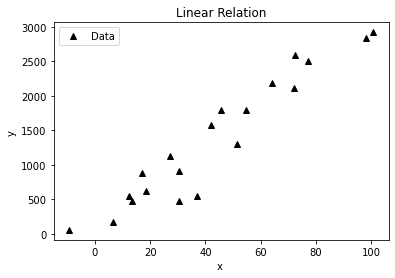

In [86]:
plt.plot(x_dat, y_dat, '^k', label= 'Data')
plt.title('Linear Relation')
plt.legend()
plt.xlabel('x ')
plt.ylabel('y ')


The posterior probability distribution function,  in general,  is the likeli-hood  times  the  prior,  properly  normalized.   In  this  case,  the  posterior  we are interested in is that for the line parameters (m,b).
Let $\theta$ be the model parameters and $\textbf{D}$ the evidence or data. The prior probability is given by:

$$
P(\theta \mid D) = \frac{P(D \mid \theta) P(\theta)}{P(D)}
$$

where $P(D \mid \theta)$ is the likelihood, $P(\theta)$ is the prior probability and $P(D)$ is the evidence. From this expresion we can see that, to compute the posterior probability we need to know the prior probability and the likelihood. Let's define a function to estimate the logarith of likelihood, given analitically by:

$$
- \ln\left [ L(x,y| \theta) \right ] = 1/2 \sum_{i}\left [ \frac{(y_{i}-\lambda(x_{i},\theta))^{2}}{\sigma^{2}} \right ] + \ln \left (  \frac{1}{2 \pi \sigma^{2}} \right)
$$

In [87]:
#Estimaremos el posterior definiendo funciones para el likelihood y prior.

def ln_likelihood(theta, x_dat, y_dat):
    m, b, sigma = theta
    y_mod = m * x_dat + b
    return -0.5 * np.sum((y_dat - y_mod) ** 2 / sigma** 2 + np.log(2*np.pi*sigma**2))


The prior function encodes any previous knowledge that we have about the parameters

In [88]:
# Definimos la función prior

def ln_prior(theta):
    m, b, sigma = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < sigma < 1.0:
        return 0.0
    return -np.inf
    

In [89]:
# Con estas funciones definimos el posterior
def ln_posterior(theta, x_dat, y_dat):
    return ln_prior(theta) + ln_likelihood(theta, x_dat, y_dat)

2. Draw a sample parameter from a normal distribution centered in the starting point, and with some σ dispersion

In [91]:
# generamos un nuevo punto, theta_0, en el espacio de los parámetros a partir de una distribución Gaussiana centrada
# en el punto (mu, sigma) definido previamente
theta_0

def GaussianPrior(theta):
    m, b, sigma = theta
    
    

GaussianMod_prior = GaussianPrior(theta)

#